## Atividade 02
### 1. How To Isolate Trend, Seasonality And Noise From A Time Series


<Axes: >

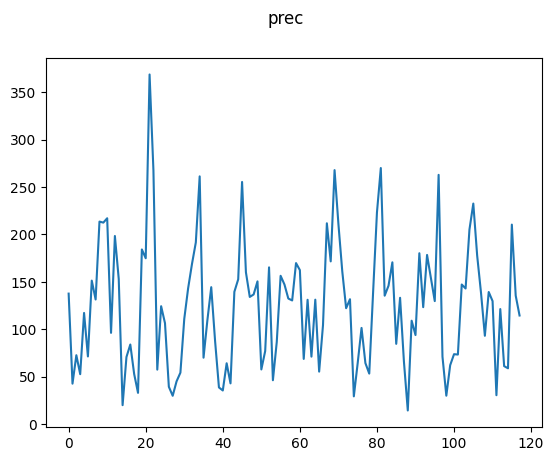

In [15]:

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')
 
df = pd.read_csv('C:/Users/Windows 10/Documents/Python/ENS410064-1/scripts/atividade_02_brutos.csv')
fig = plt.figure()
 
fig.suptitle('prec')
 
df['prec'].plot()

C:\Users\Windows 10\AppData\Local\Temp\ipykernel_14372\1780947669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flow'][i] = np.round(
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_14372\1780947669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flow'][i] = np.round(
C:\Users\Windows 10\AppData\Local\Temp\ipykernel_14372\1780947669.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flow'][i] = np.round(
C:\User

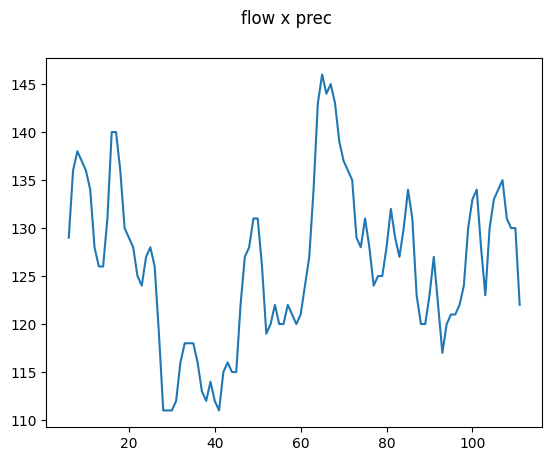

In [33]:
#Add an empty column to store the 2x12 centered MA values
df['flow'] = np.nan

#Fill it up with the 2x12 centered MA values
for i in range(6,df['prec'].size-6):
    df['flow'][i] = np.round(
        df['prec'][i - 6] * 1.0 / 24 +
        (
            df['prec'][i - 5] +
            df['prec'][i - 4] +
            df['prec'][i - 3] +
            df['prec'][i - 2] +
            df['prec'][i - 1] +
            df['prec'][i] +
            df['prec'][i + 1] +
            df['prec'][i + 2] +
            df['prec'][i + 3] +
            df['prec'][i + 4] +
            df['prec'][i + 5]
        ) * 1.0 / 12 +
        df['prec'][i + 6] * 1.0 / 24)

        #plot the trend component
fig = plt.figure()
 
fig.suptitle('flow x prec')
 
df['flow'].plot()
 
plt.show()

### 2. The White Noise Mode

In [3]:

import pandas as pd
import numpy as np
import math
from matplotlib import pyplot as plt

In [4]:
mydateparser = lambda x: pd.datetime.strptime(x, '%d-%m-%y')
 
df = pd.read_csv('C:/Users/Windows 10/Documents/Python/ENS410064-1/scripts/atividade_02_brutos.csv', header=0, index_col=[0])
df.head(10)

prec       temp         q      flow     p1     p2
date                                                         
3/1/2010   137.5  23.977419  132.1334  3.058648  247.9   27.2
4/1/2010    42.5  22.410000  114.1101  2.729490   85.1    NaN
5/1/2010    72.5  20.785806   94.0366  2.176752   26.8  117.9
6/1/2010    52.5  18.384000   78.3973  1.875240    0.8  104.3
7/1/2010   117.1  19.756129   72.7495  1.684023    NaN  234.7
8/1/2010    71.2  20.072258   65.4181  1.514310    NaN  143.9
9/1/2010   151.2  21.549333   62.3261  1.490837   71.0  231.4
10/1/2010  131.3  22.430968   79.0101  1.828932  216.6   45.6
11/1/2010  213.5  22.009333  167.1076  3.997177  396.6   30.0
12/1/2010  212.4  24.095484  231.6618  5.362552  293.2  131.4

In [5]:
import statsmodels.graphics.tsaplots as tsa



SyntaxError: incomplete input (1538615374.py, line 3)

### 3. The Assumptions Of Linear Regression, And How To Test Them

In [15]:
from patsy import dmatrices


In [39]:
df = pd.read_csv('C:/Users/Windows 10/Documents/Python/ENS410064-1/scripts/atividade_02_brutos_float.csv', header=0)


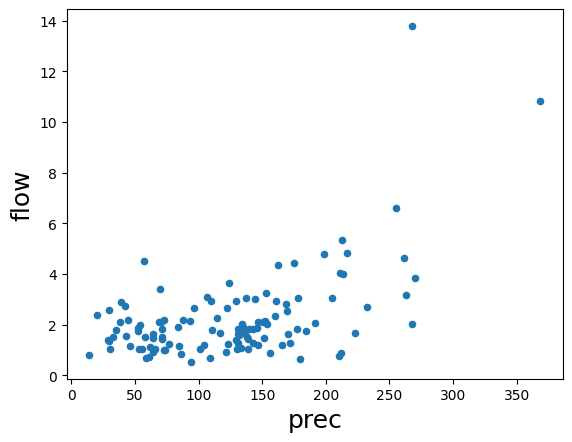

prec    1.000000
temp    0.522479
q       0.546052
flow    0.541548
p1      0.806861
p2      0.342626
Name: prec, dtype: float64

In [50]:
df.plot.scatter(x='prec', y='flow')
plt.xlabel('prec', fontsize=18)
plt.ylabel('flow', fontsize=18)
plt.show()
df.corr()['prec']


In [58]:
## Estava dando erro por a Data estava em formato STR, tive que mudar no próprio arquivo csv para um dado float
model_expr = 'prec + flow'
y, x = dmatrices(model_expr, df, return_type='dataframe')

PatsyError: model is missing required outcome variables

PatsyError: model is missing required outcome variables